本ノートブックは、日本の大学データを使った
データ分析の練習用課題です。

目的：
・pandasの基本操作を理解する
・データから傾向を読み取る
・グラフを作成して説明する

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_csv("japanese_universities.csv")
df.head()

,Unnamed: 0,code,name,name_jp,type,type_jp,address,postal_code,phone,state,...,longitude,found,faculty_count,department_count,has_grad,has_remote,review_rating,review_count,difficulty_SD,difficulty_rank
0,0,F101110100010,Hokkaido University,北海道大学,National,国立,北海道札幌市北区北8条西5丁目,060－0808,011－716－2111,Hokkai Do,...,141.347153,1876-08,33,78,True,False,4.16,1389.0,60.4,A
1,1,F101110100029,Hokkaido University of Education,北海道教育大学,National,国立,北海道札幌市北区あいの里5条3－1－3,002－8501,011－778－0206,Hokkai Do,...,141.393753,1943-04,3,8,True,False,3.79,544.0,47.1,D
2,2,F101110100038,Muroran Institute of Technology,室蘭工業大学,National,国立,北海道室蘭市水元町27－1,050－8585,0143－46－5000,Hokkai Do,...,141.034042,1897-05,3,10,True,False,3.66,126.0,39.0,F
3,3,F101110100047,Otaru University of Commerce,小樽商科大学,National,国立,北海道小樽市緑3－5－21,047－8501,0134－27－5206,Hokkai Do,...,140.979370,1910-03,2,6,True,False,3.80,257.0,50.0,C
4,4,F101110100056,Obihiro University of Agriculture And Veterina...,帯広畜産大学,National,国立,北海道帯広市稲田町西2線11,080－8555,0155－49－5216,Hokkai Do,...,143.177979,1941-04,3,5,True,False,4.20,87.0,54.5,B


### データの確認

* データに 重複（duplicate） はありますか。

* NaN（空のデータ） はありますか。

* どのカラムに NaN が一番多い ですか。

In [5]:
print(f'重複デタ{df.duplicated().values.any()}')

重複デタFalse


In [11]:
print(f'is duplicated:{df.duplicated().values.sum()}')
print(f'did it duplicate?:{df.duplicated().values.any()}')
print(f'is na exist?:{df.isna().values.any()}')
print(f'is na count?:{df.isna().values.sum()}')
print(f'what data is na? : {df.isna().sum()}')

is duplicated:0
did it duplicate?:False
is na exist?:True
is na count?:151
what data is na? : Unnamed: 0           0
code                 0
name                 0
name_jp              0
type                 0
type_jp              0
address              0
postal_code          0
phone                3
state                0
state_jp             0
latitude             0
longitude            0
found                0
faculty_count        0
department_count     0
has_grad             0
has_remote           0
review_rating       15
review_count        15
difficulty_SD       59
difficulty_rank     59
dtype: int64


### 大学の種類

* type カラムには、何種類の大学 がありますか。

* それぞれの大学は いくつ ありますか。


In [15]:
print(df.describe())

       Unnamed: 0    latitude   longitude  faculty_count  department_count  \
count  813.000000  813.000000  813.000000     813.000000        813.000000   
mean   406.000000   35.665309  137.118635       5.985240         12.629766   
std    234.837178    2.312571    3.286785       6.282533         16.879957   
min      0.000000   26.200539  127.694443       1.000000          1.000000   
25%    203.000000   34.707886  135.462921       2.000000          3.000000   
50%    406.000000   35.467346  137.737991       4.000000          7.000000   
75%    609.000000   35.862579  139.713745       7.000000         15.000000   
max    812.000000   45.383553  144.393768      44.000000        149.000000   

       review_rating  review_count  difficulty_SD  
count     798.000000    798.000000     754.000000  
mean        3.813108    239.082707      43.246286  
std         0.277132    410.102565       7.654845  
min         2.000000      1.000000      35.000000  
25%         3.670000     41.000000   

In [21]:
type_val = df['type_jp']
print(f'Number of types in the universities: {len(type_val)}')
unique_val = type_val.unique()
nunique_val = type_val.value_counts()
print(f'Number of unique types: {nunique_val}')
print(f'Unique types: {unique_val}')

Number of types in the universities: 813
Number of unique types: type_jp
私立    626
公立    101
国立     86
Name: count, dtype: int64
Unique types: ['国立' '公立' '私立']


### レビュー分析

* review_rating の 平均 はいくつですか。

* review_rating が 一番高い大学を10校 出してください。



In [ ]:
review_ratin = df['review_rating']
print(f'Review rating statistics:\n{review_ratin.describe()}')

Review rating statistics:
count    798.000000
mean       3.813108
std        0.277132
min        2.000000
25%        3.670000
50%        3.820000
75%        3.950000
max        5.000000
Name: review_rating, dtype: float64
0      4.16
1      3.79
2      3.66
3      3.80
4      4.20
       ... 
808    3.88
809    4.23
810    2.00
811     NaN
812    3.50
Name: review_rating, Length: 813, dtype: float64


In [25]:
top_10_reviews = df.nlargest(10, 'review_rating')
print(f"Top 10 Universities by Review Rating:{top_10_reviews[['name', 'review_rating']]}")

Top 10 Universities by Review Rating:                                                  name  review_rating
82      National Graduate Institute For Policy Studies           5.00
392  International College For Postgraduate Buddhis...           5.00
436   Graduate School of Management, GLOBIS University           5.00
495                        Toho Gakuen Graduate School           5.00
508                               Minobusan University           5.00
578  International Professional University of Techn...           5.00
589   Biwako Professional University of Rehabilitation           5.00
83   The Graduate University for Advanced Studies, ...           4.58
776               Fukuoka Jo Gakuin Nursing University           4.52
206                                Ikueikan University           4.43


### 難しさの分析

* difficulty_rank には、どんな 種類 がありますか。

* それぞれのランクに 何校 ありますか。

In [29]:
diffucult = df['difficulty_rank']
unique_diffucult = diffucult.unique()
print(f'Unique difficulty ranks: {unique_diffucult}')
types_diffucult = diffucult.value_counts()
print(f'Difficulty rank counts:\n{types_diffucult}')

Unique difficulty ranks: ['A' 'D' 'F' 'C' 'B' 'E' 'S' nan]
Difficulty rank counts:
difficulty_rank
F    320
E    153
C    118
D     91
B     38
A     24
S     10
Name: count, dtype: int64


### 地域分析

* state_jp ごとに見て、
　大学が一番多い地域を5つ 出してください。

* 地図を使って、大学の場所を 見えるように してください。

state_jp
東京都    146
大阪府     58
愛知県     52
北海道     37
兵庫県     36
Name: count, dtype: int64


/home/puujee/facerecog/venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 26481 (\N{CJK UNIFIED IDEOGRAPH-6771}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/puujee/facerecog/venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 20140 (\N{CJK UNIFIED IDEOGRAPH-4EAC}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/puujee/facerecog/venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 37117 (\N{CJK UNIFIED IDEOGRAPH-90FD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/puujee/facerecog/venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 22823 (\N{CJK UNIFIED IDEOGRAPH-5927}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/puujee/facerecog/venv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 

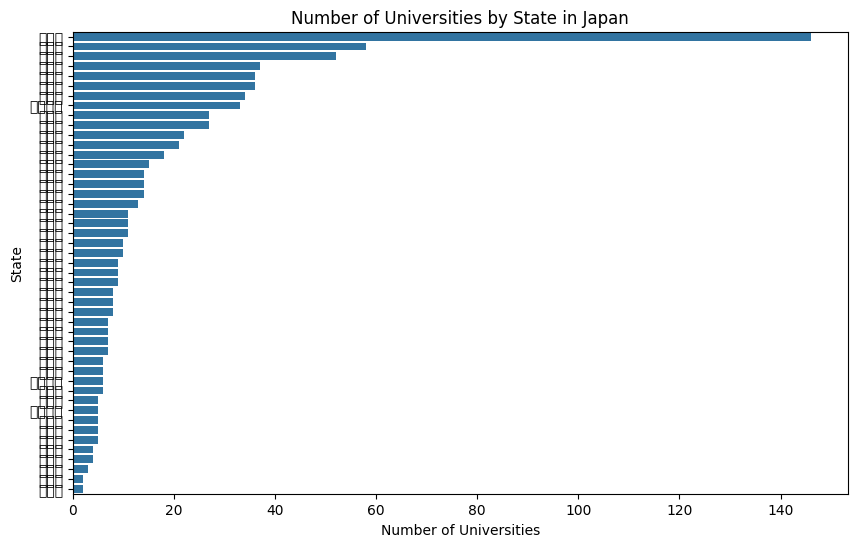

In [34]:
state = df['state_jp']
print(state.value_counts()[:5])
plt.figure(figsize=(10,6))
sns.countplot(y='state_jp', data=df, order=df['state_jp'].value_counts().index)
plt.title('Number of Universities by State in Japan')
plt.xlabel('Number of Universities')
plt.ylabel('State')
plt.show()

### 学部数と学科数の関係
* faculty_count と department_count の
　相関（関係） を調べてください。

* scatter plot（点のグラフ）を作ってください。

/tmp/ipykernel_30499/1362512613.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=faculty_counts.values, y=faculty_counts.index, palette='viridis')


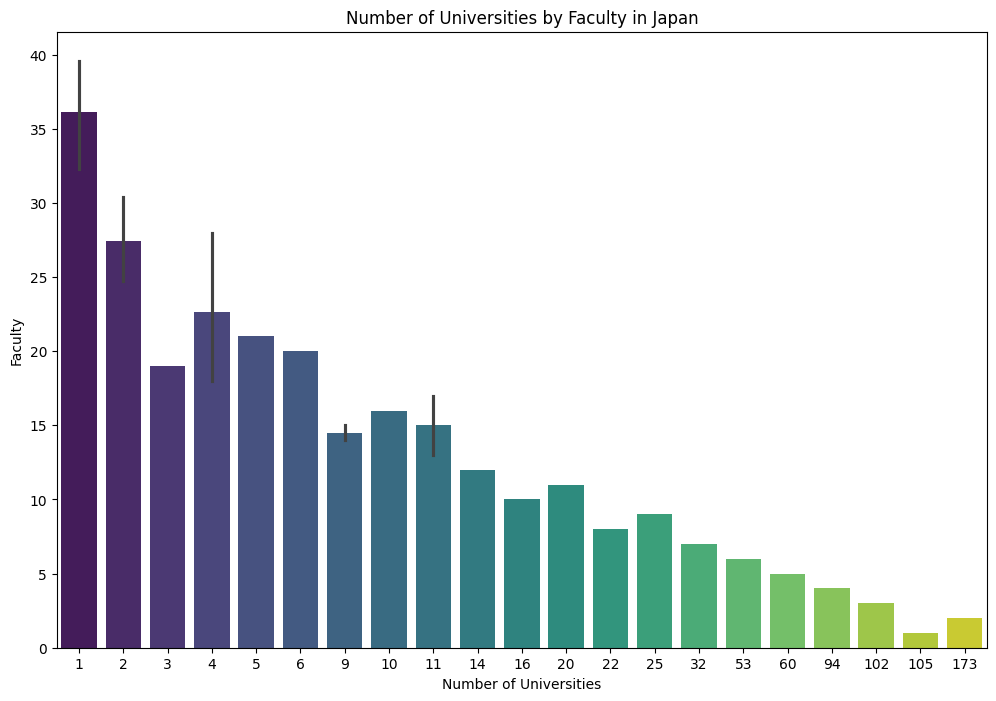

In [36]:
faculty_counts = df['faculty_count'].value_counts()
plt.figure(figsize=(12,8))
sns.barplot(x=faculty_counts.values, y=faculty_counts.index, palette='viridis')
plt.title('Number of Universities by Faculty in Japan')
plt.xlabel('Number of Universities')
plt.ylabel('Faculty')
plt.show()

/tmp/ipykernel_30499/3998302593.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=departument_counts.values, y=departument_counts.index, palette='magma')


Text(0.5, 1.0, 'Number of Universities by Department in Japan')

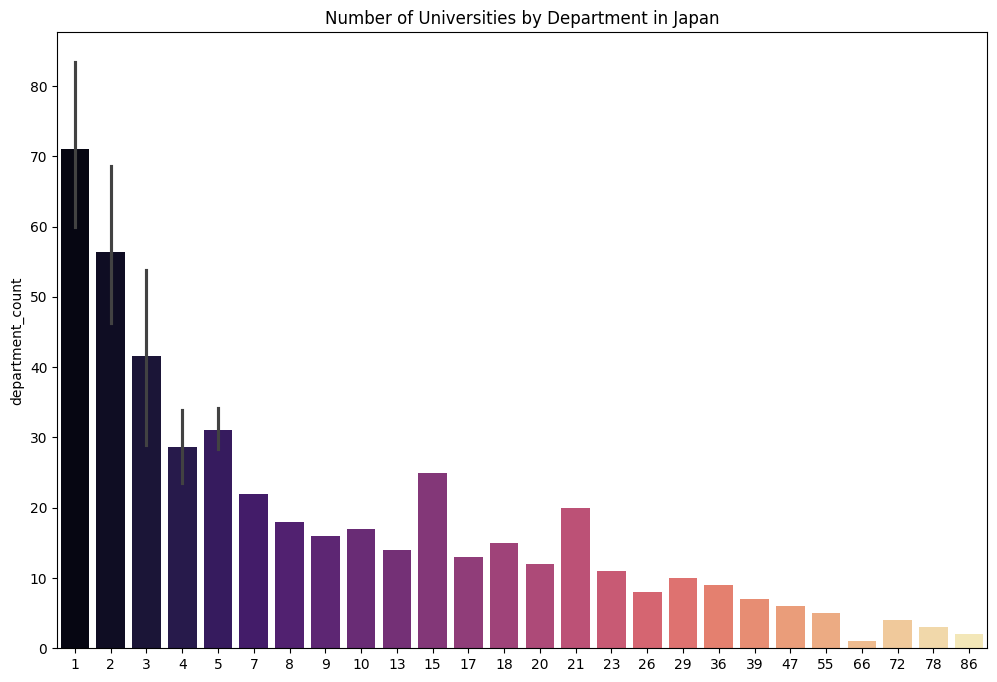

In [37]:
departument_counts = df['department_count'].value_counts()
plt.figure(figsize=(12,8))
sns.barplot(x=departument_counts.values, y=departument_counts.index, palette='magma')
plt.title('Number of Universities by Department in Japan')  

Correlation between department count and faculty count: 0.9049009073175523


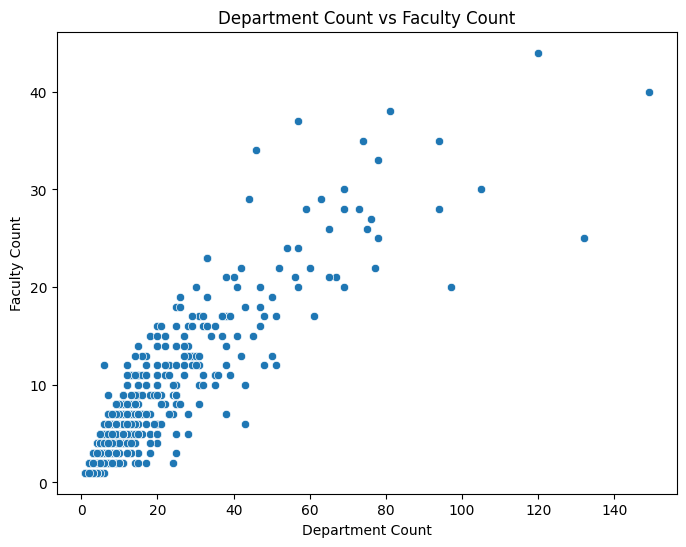

In [38]:
correlation_matrix = df['department_count'].corr(df['faculty_count'])
print(f'Correlation between department count and faculty count: {correlation_matrix}')
plt.figure(figsize=(8,6))
sns.scatterplot(x='department_count', y='faculty_count', data=df)
plt.title('Department Count vs Faculty Count')
plt.xlabel('Department Count')
plt.ylabel('Faculty Count')
plt.show()

    ### 大学の種類による比較
    * 平均 review_rating

    * 平均 faculty_count

In [40]:
avg_rating = df['review_rating'].mean()
print(f'Average Review Rating across all universities: {avg_rating}')

Average Review Rating across all universities: 3.813107769423559


In [41]:
avg_faculty_count = df['faculty_count'].mean()
print(f'Average Faculty Count across all universities: {avg_faculty_count}')

Average Faculty Count across all universities: 5.985239852398524


### レビュー数の分布
* review_count の histogram を作ってください。

* 次の３つに分けてください。
　・0〜50
　・50〜200
　・200以上

Max review count: 4280.0


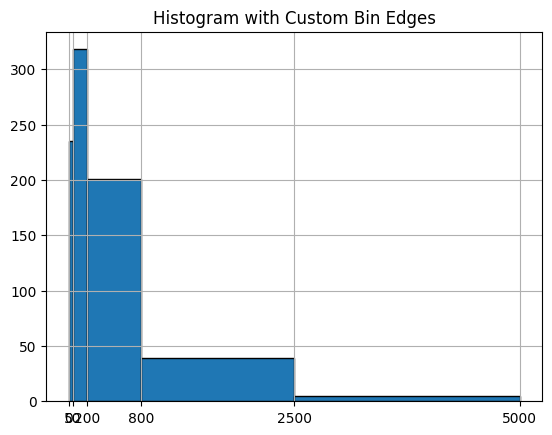

In [54]:
custom_bins = [0,50,200,800,2500,5000]
max_value = df['review_count'].max()
print(f'Max review count: {max_value}')
df['review_count'].hist(bins=custom_bins,edgecolor='black')
plt.title('Histogram with Custom Bin Edges')
plt.xticks(custom_bins) # Ensure the labels show your bin numbers
plt.show()

In [71]:
!pip install IPython

### 都道府県ごとのトップ大学
* state_jp ごとに、
　一番 rating が高い大学を1校 出してください。

* 結果を table（表） で見せてください。

In [73]:
from IPython.display import display
states = df['state'].unique()
print(f'Unique states in the dataset: {states}')
for i in range(len(states)):
    state_data = df[df['state'] == states[i]]
    top_5 = state_data.nlargest(5,'review_rating')
    print(f'Top 5 review ratings in {states[i]}: {top_5}')
    top_5_name = top_5['name']
    display(top_5_name)
    

Unique states in the dataset: ['Hokkai Do' 'Aomori Ken' 'Iwate Ken' 'Miyagi Ken' 'Akita Ken'
 'Yamagata Ken' 'Fukushima Ken' 'Ibaraki Ken' 'Tochigi Ken' 'Gunma Ken'
 'Saitama Ken' 'Chiba Ken' 'Tokyo To' 'Kanagawa Ken' 'Niigata Ken'
 'Toyama Ken' 'Ishikawa Ken' 'Fukui Ken' 'Yamanashi Ken' 'Nagano Ken'
 'Gifu Ken' 'Shizuoka Ken' 'Aichi Ken' 'Mie Ken' 'Shiga Ken' 'Kyoto Fu'
 'Osaka Fu' 'Hyogo Ken' 'Nara Ken' 'Wakayama Ken' 'Tottori Ken'
 'Shimane Ken' 'Okayama Ken' 'Hiroshima Ken' 'Yamaguchi Ken'
 'Tokushima Ken' 'Kagawa Ken' 'Ehime Ken' 'Kochi Ken' 'Fukuoka Ken'
 'Saga Ken' 'Nagasaki Ken' 'Kumamoto Ken' 'Oita Ken' 'Miyazaki Ken'
 'Kagoshima Ken' 'Okinawa Ken']
Top 5 review ratings in Hokkai Do:      Unnamed: 0           code  \
206         206  F101310100338   
4             4  F101110100056   
0             0  F101110100010   
86           86  F101210100081   
89           89  F101210100116   

                                                  name name_jp      type  \
206              

206                                  Ikueikan University
4      Obihiro University of Agriculture And Veterina...
0                                    Hokkaido University
86                            Sapporo Medical University
89                                Nayoro City University
Name: name, dtype: object

Top 5 review ratings in Aomori Ken:      Unnamed: 0           code                                       name  \
93           93  F102210100598    Aomori University of Health And Welfare   
212         212  F102310100612                  Shibata Gakuen University   
7             7  F102110100572                        Hirosaki University   
92           92  F102210100589                   Aomori Public University   
217         217  F102310100667  Hirosaki University of Health and Welfare   

      name_jp      type type_jp              address postal_code  \
93   青森県立保健大学    Public      公立    青森県青森市大字浜館字間瀬58－1    030－8505   
212    柴田学園大学   Private      私立       青森県弘前市清原1－1－16    036－8530   
7        弘前大学  National      国立           青森県弘前市文京町1    036－8560   
92     青森公立大学    Public      公立  青森県青森市大字合子沢字山崎153－4    030－0196   
217  弘前医療福祉大学   Private      私立      青森県弘前市小比内3－18－1    036－8102   

            phone       state  ...   longitude    found  faculty_count  \
93   017－765－2000 

93       Aomori University of Health And Welfare
212                    Shibata Gakuen University
7                            Hirosaki University
92                      Aomori Public University
217    Hirosaki University of Health and Welfare
Name: name, dtype: object

Top 5 review ratings in Iwate Ken:      Unnamed: 0           code                          name name_jp  \
94           94  F103210100748  Iwate Prefectural University  岩手県立大学   
8             8  F103110100731              Iwate University    岩手大学   
220         220  F103310100773     The University of Morioka    盛岡大学   
219         219  F103310100764               Fuji University    富士大学   
218         218  F103310100755      Iwate Medical University  岩手医科大学   

         type type_jp            address postal_code         phone      state  \
94     Public      公立     岩手県滝沢市巣子152－52    020－0693  019－694－2000  Iwate Ken   
8    National      国立     岩手県盛岡市上田3－18－8    020－8550  019－621－6006  Iwate Ken   
220   Private      私立        岩手県滝沢市砂込808    020－0694  019－688－5555  Iwate Ken   
219   Private      私立     岩手県花巻市下根子450－3    025－8501  0198－23－6221  Iwate Ken   
218   Private      私立  岩手県紫波郡矢巾町医大通1－1－1    028－3694  019－651－5111  Iwate Ken   

     ...   longitude    found  faculty_count 

94     Iwate Prefectural University
8                  Iwate University
220       The University of Morioka
219                 Fuji University
218        Iwate Medical University
Name: name, dtype: object

Top 5 review ratings in Miyagi Ken:      Unnamed: 0           code                                 name   name_jp  \
9             9  F104110100856                    Tohoku University      東北大学   
10           10  F104110100865       Miyagi University of Education    宮城教育大学   
228         228  F104310100941     Miyagi Gakuin Women’s University  宮城学院女子大学   
232         232  F104310100987             Shokei Gakuin University    尚絅学院大学   
95           95  F104210100872  Miyagi Akita Prefectural University      宮城大学   

         type type_jp            address postal_code         phone  \
9    National      国立   宮城県仙台市青葉区片平2－1－1    980－8577  022－717－7800   
10   National      国立  宮城県仙台市青葉区荒巻字青葉149    980－0845  022－214－3417   
228   Private      私立  宮城県仙台市青葉区桜ケ丘9－1－1    981－8557  022－279－1311   
232   Private      私立   宮城県名取市ゆりが丘4－10－1    981－1295  022－381－3300   
95     Public      公立     宮城県黒川郡大和町学苑1－1    981－3298  022－377－8205   

          state  ...   longitude    found  faculty_count

9                        Tohoku University
10          Miyagi University of Education
228       Miyagi Gakuin Women’s University
232               Shokei Gakuin University
95     Miyagi Akita Prefectural University
Name: name, dtype: object

Top 5 review ratings in Akita Ken:      Unnamed: 0           code                                         name  \
97           97  F105210101077               Akita International University   
234         234  F105310101100      Akita University of Nursing And Welfare   
96           96  F105210101068                 Akita Prefectural University   
235         235  F105310101119  Japanese Red Cross Akita College of Nursing   
11           11  F105110101051                             Akita University   

         name_jp      type type_jp                  address postal_code  \
97        国際教養大学    Public      公立           秋田県秋田市雄和椿川字奥椿岱    010－1292   
234     秋田看護福祉大学   Private      私立            秋田県大館市清水2－3－4    017－0046   
96        秋田県立大学    Public      公立  秋田県秋田市下新城中野字街道端西241－438    010－0195   
235  日本赤十字秋田看護大学   Private      私立      秋田県秋田市上北手猿田字苗代沢17－3    010－1493   
11          秋田大学  National      国立           秋田県秋田市手形学園町1－1    010－8502   

            phone      state  ...   lon

97                  Akita International University
234        Akita University of Nursing And Welfare
96                    Akita Prefectural University
235    Japanese Red Cross Akita College of Nursing
11                                Akita University
Name: name, dtype: object

Top 5 review ratings in Yamagata Ken:      Unnamed: 0           code  \
236         236  F106310101207   
99           99  F106210101183   
100         100  F106210101192   
238         238  F106310101225   
12           12  F106110101176   

                                                  name     name_jp      type  \
236                  Tohoku University of Art & Design    東北芸術工科大学   Private   
99   Yamagata Prefectural University of Health Scie...  山形県立保健医療大学    Public   
100  Yamagata Prefectural Yonezawa University of Nu...  山形県立米沢栄養大学    Public   
238                              Tohoku Bunkyo College      東北文教大学   Private   
12                                 Yamagata University        山形大学  National   

    type_jp           address postal_code         phone         state  ...  \
236      私立    山形県山形市上桜田3－4－5    990－9530  023－627－2000  Yamagata Ken  ...   
99       公立       山形県山形市上柳260    990－2212  023－686－6611  Yamagata Ken  ...   
100      公立    山形県米沢市通町6－15－1    992－0025 

236                    Tohoku University of Art & Design
99     Yamagata Prefectural University of Health Scie...
100    Yamagata Prefectural Yonezawa University of Nu...
238                                Tohoku Bunkyo College
12                                   Yamagata University
Name: name, dtype: object

Top 5 review ratings in Fukushima Ken:      Unnamed: 0           code                                     name  \
102         102  F107210101299                   The University of Aizu   
101         101  F107210101280             Fukushima Medical University   
243         243  F107310101340                        Fukushima College   
242         242  F107310101331  Higashi Nippon International University   
239         239  F107310101304              Koriyama Women’s University   

      name_jp     type type_jp                address postal_code  \
102      会津大学   Public      公立  福島県会津若松市一箕町大字鶴賀字上居合90    965－8580   
101  福島県立医科大学   Public      公立             福島県福島市光が丘1    960－1295   
243    福島学院大学  Private      私立         福島県福島市宮代乳児池1－1    960－0181   
242   東日本国際大学  Private      私立       福島県いわき市平鎌田字寿金沢37    970－8023   
239    郡山女子大学  Private      私立         福島県郡山市開成3－25－2    963－8503   

            phone          state  ...   longitude    found  faculty_count  \
102  0242－37－2500 

102                     The University of Aizu
101               Fukushima Medical University
243                          Fukushima College
242    Higashi Nippon International University
239                Koriyama Women’s University
Name: name, dtype: object

Top 5 review ratings in Ibaraki Ken:      Unnamed: 0           code  \
15           15  F108110101423   
16           16  F108110101432   
103         103  F108210101449   
244         244  F108310101456   
14           14  F108110101414   

                                                  name    name_jp      type  \
15                               University of Tsukuba       筑波大学  National   
16                    Tsukuba University of Technology     筑波技術大学  National   
103  Ibaraki Prefectural University of Health Sciences   茨城県立医療大学    Public   
244                       Ibaraki Christian University  茨城キリスト教大学   Private   
14                                  Ibaraki University       茨城大学  National   

    type_jp            address postal_code         phone        state  ...  \
15       国立    茨城県つくば市天王台1－1－1    305－8577  029－853－2111  Ibaraki Ken  ...   
16       国立   茨城県つくば市天久保4－3－15    305－8520  029－852－2931  Ibaraki Ken  ...   
103      公立  茨城県稲敷郡阿見町阿見4669－2    300－0394  029－8

15                                 University of Tsukuba
16                      Tsukuba University of Technology
103    Ibaraki Prefectural University of Health Sciences
244                         Ibaraki Christian University
14                                    Ibaraki University
Name: name, dtype: object

Top 5 review ratings in Tochigi Ken:      Unnamed: 0           code  \
256         256  F109310101623   
17           17  F109110101556   
257         257  F109310101632   
253         253  F109310101598   
251         251  F109310101570   

                                               name   name_jp      type  \
256                        Jichi Medical University    自治医科大学   Private   
17                            Utsunomiya University     宇都宮大学  National   
257                       Dokkyo Medical University    獨協医科大学   Private   
253  International University of Health And Welfare  国際医療福祉大学   Private   
251                               Hakuoh University      白鴎大学   Private   

    type_jp             address postal_code         phone        state  ...  \
256      私立     栃木県下野市薬師寺3311－1    329－0498  0285－44－2111  Tochigi Ken  ...   
17       国立        栃木県宇都宮市峰町350    321－8505  028－649－8172  Tochigi Ken  ...   
257      私立  栃木県下都賀郡壬生町大字北小林880    321－0293  0282－86－1111  Tochigi Ken

256                          Jichi Medical University
17                              Utsunomiya University
257                         Dokkyo Medical University
253    International University of Health And Welfare
251                                 Hakuoh University
Name: name, dtype: object

Top 5 review ratings in Gunma Ken:      Unnamed: 0           code                                          name  \
107         107  F110210101757  Gunma Prefectural College of Health Sciences   
106         106  F110210101748          Gunma Prefectural Women’s University   
266         266  F110310101844                       KYOAI GAKUEN UNIVERSITY   
18           18  F110110101713                              Gunma University   
263         263  F110310101817               Takasaki University of Commerce   

          name_jp      type type_jp             address postal_code  \
107  群馬県立県民健康科学大学    Public      公立      群馬県前橋市上沖町323－1    371－0052   
106      群馬県立女子大学    Public      公立  群馬県佐波郡玉村町上之手1395－1    370－1193   
266    共愛学園前橋国際大学   Private      私立    群馬県前橋市小屋原町1154－4    379－2192   
18           群馬大学  National      国立        群馬県前橋市荒牧町4－2    371－8510   
263        高崎商科大学   Private      私立       群馬県高崎市根小屋町741    370－1214   

            phone      state  ...   longitude    found  f

107    Gunma Prefectural College of Health Sciences
106            Gunma Prefectural Women’s University
266                         KYOAI GAKUEN UNIVERSITY
18                                 Gunma University
263                 Takasaki University of Commerce
Name: name, dtype: object

Top 5 review ratings in Saitama Ken:      Unnamed: 0           code                            name name_jp  \
108         108  F111210101952  Saitama Prefectural University  埼玉県立大学   
289         289  F111310102183     Kagawa Nutrition University  女子栄養大学   
270         270  F111310101996                Urawa University    浦和大学   
281         281  F111310102101           Toho College of Music  東邦音楽大学   
279         279  F111310102085  Tokyo International University  東京国際大学   

        type type_jp             address postal_code         phone  \
108   Public      公立        埼玉県越谷市三野宮820    343－8540  048－971－0500   
289  Private      私立     埼玉県坂戸市千代田3－9－21    350－0288  049－282－3601   
270  Private      私立  埼玉県さいたま市緑区大字大崎3551    336－0974  048－878－3741   
281  Private      私立          埼玉県川越市今泉84    350－0015  049－235－2157   
279  Private      私立     埼玉県川越市的場北1－13－1    350－1197  049－232－1111   

           state  ...   longitude    found  faculty_count department_count  \
108  Saitama Ken  .

108    Saitama Prefectural University
289       Kagawa Nutrition University
270                  Urawa University
281             Toho College of Music
279    Tokyo International University
Name: name, dtype: object

Top 5 review ratings in Chiba Ken:      Unnamed: 0           code                             name  name_jp  \
310         310  F112310102547       Tokyo Christian University  東京基督教大学   
315         315  F112310102592            Saniku Gakuin College   三育学院大学   
20           20  F112110102337                 Chiba University     千葉大学   
294         294  F112310102388  Kaichi International University   開智国際大学   
303         303  F112310102477          Wayo Women’s University   和洋女子大学   

         type type_jp            address postal_code         phone      state  \
310   Private      私立    千葉県印西市内野3－301－5    270－1347  0476－46－1131  Chiba Ken   
315   Private      私立  千葉県夷隅郡大多喜町久我原1500    298－0297  0470－84－0111  Chiba Ken   
20   National      国立   千葉県千葉市稲毛区弥生町1－33    263－8522  043－251－1111  Chiba Ken   
294   Private      私立       千葉県柏市柏1225－6    277－0005  04－7167－8655  Chiba Ken   
303   Private      私立     千葉県市川市国府台2－3－1    272－8533  047－371－1111  Chiba Ken   

     ...   longitude 

310         Tokyo Christian University
315              Saniku Gakuin College
20                    Chiba University
294    Kaichi International University
303            Wayo Women’s University
Name: name, dtype: object

Top 5 review ratings in Tokyo To:      Unnamed: 0           code  \
82           82  F113110102808   
392         392  F113310103590   
436         436  F113310104036   
404         404  F113310103714   
348         348  F113310103153   

                                                  name       name_jp  \
82      National Graduate Institute For Policy Studies     政策研究大学院大学   
392  International College For Postgraduate Buddhis...    国際仏教学大学院大学   
436   Graduate School of Management, GLOBIS University  グロービス経営大学院大学   
404                 International Christian University       国際基督教大学   
348                 St.Luke’s International University       聖路加国際大学   

         type type_jp                 address postal_code         phone  \
82   National      国立          東京都港区六本木7－22－1    106－8677  03－6439－6000   
392   Private      私立           東京都文京区春日2-8-9    112-0003  03-5981-5271   
436   Private      私立  東京都千代田区二番町5－1住友不動産麹町ビル    102－0084           NaN   
404   Private      私立       

82        National Graduate Institute For Policy Studies
392    International College For Postgraduate Buddhis...
436     Graduate School of Management, GLOBIS University
404                   International Christian University
348                   St.Luke’s International University
Name: name, dtype: object

Top 5 review ratings in Kanagawa Ken:      Unnamed: 0           code  \
83           83  F114110104609   
451         451  F114310104632   
113         113  F114210104625   
455         455  F114310104678   
468         468  F114310104801   

                                                  name      name_jp      type  \
83   The Graduate University for Advanced Studies, ...    総合研究大学院大学  National   
451                                   Seisa University         星槎大学   Private   
113              Kanagawa University of Human Services  神奈川県立保健福祉大学    Public   
455                                  Ferris University    フェリス女学院大学   Private   
468                          Showa University of Music       昭和音楽大学   Private   

    type_jp                address postal_code         phone         state  \
83       国立      神奈川県三浦郡葉山町（湘南国際村）    240－0193  046－858－1500  Kanagawa Ken   
451      私立  神奈川県足柄下郡箱根町仙石原817－255    250－0613  0460－83－8202  Kanagawa Ken   
113      公立      神奈川県横須賀市平成町1－10－1  

83     The Graduate University for Advanced Studies, ...
451                                     Seisa University
113                Kanagawa University of Human Services
455                                    Ferris University
468                            Showa University of Music
Name: name, dtype: object

Top 5 review ratings in Niigata Ken:      Unnamed: 0           code                              name   name_jp  \
116         116  F115210105099       Nagaoka Institute of Design    長岡造形大学   
35           35  F115110105064    Joetsu University of Education    上越教育大学   
114         114  F115210105071        Niigata College of Nursing  新潟県立看護大学   
115         115  F115210105080  University of Niigata Prefecture    新潟県立大学   
491         491  F115310105239    Kaishi Professional University   開志専門職大学   

         type type_jp              address postal_code         phone  \
116    Public      公立        新潟県長岡市千秋4－197    940－2088  0258－21－3311   
35   National      国立        新潟県上越市山屋敷町1番地    943－8512  025－522－2411   
114    Public      公立         新潟県上越市新南町240    943－0147  025－526－2811   
115    Public      公立      新潟県新潟市東区海老ケ瀬471    950－8680  025－270－1300   
491   Private      私立  新潟県新潟市中央区紫竹山6丁目3番5号    950－0914  025-240-8118   

           state  ...   longitude    found  faculty_count dep

116         Nagaoka Institute of Design
35       Joetsu University of Education
114          Niigata College of Nursing
115    University of Niigata Prefecture
491      Kaishi Professional University
Name: name, dtype: object

Top 5 review ratings in Toyama Ken:      Unnamed: 0           code                                        name  \
495         495  F116310105354                 Toho Gakuen Graduate School   
36           36  F116110105312                        University of Toyama   
118         118  F116210105329               Toyama Prefectural University   
494         494  F116310105345  Toyama University of International Studies   
493         493  F116310105336                   Takaoka University of Law   

       name_jp      type type_jp           address postal_code         phone  \
495  桐朋学園大学院大学   Private      私立  富山県富山市呉羽町1884－17    930－0138  076－434－6800   
36        富山大学  National      国立      富山県富山市五福3190    930－8555  076－445－6011   
118     富山県立大学    Public      公立      富山県射水市黒河5180    939－0398  0766－56－7500   
494     富山国際大学   Private      私立     富山県富山市東黒牧65－1    930－1292  076－483－8000   
493     高岡法科大学   Private      私立   富山県高岡市戸出石代307－3    939－1193  0766－63－3388   

          stat

495                   Toho Gakuen Graduate School
36                           University of Toyama
118                 Toyama Prefectural University
494    Toyama University of International Studies
493                     Takaoka University of Law
Name: name, dtype: object

Top 5 review ratings in Ishikawa Ken:      Unnamed: 0           code                                     name  \
121         121  F117210105435                  Kanazawa College of Art   
498         498  F117310105479              Kanazawa Medical University   
501         501  F117310105503                         Kinjo University   
122         122  F117210105444  Ishikawa Prefectural Nursing University   
502         502  F117310105512                Hokurikugakuin University   

      name_jp     type type_jp          address postal_code         phone  \
121  金沢美術工芸大学   Public      公立  石川県金沢市小立野5－11－1    920－8656  076－262－3531   
498    金沢医科大学  Private      私立  石川県河北郡内灘町字大学1－1    920－0293  076－286－2211   
501      金城大学  Private      私立    石川県白山市笠間町1200    924－8511  076－276－4400   
122  石川県立看護大学   Public      公立    石川県かほく市学園台1－1    929－1210  076－281－8300   
502    北陸学院大学  Private      私立    石川県金沢市三小牛町イ11    920－1396  076－280－3850   

            state  ...   longitude    found  fac

121                    Kanazawa College of Art
498                Kanazawa Medical University
501                           Kinjo University
122    Ishikawa Prefectural Nursing University
502                  Hokurikugakuin University
Name: name, dtype: object

Top 5 review ratings in Fukui Ken:      Unnamed: 0           code                            name   name_jp  \
124         124  F118210105611      Tsuruga Nursing University  敦賀市立看護大学   
505         505  F118310105637               Jin-Ai University      仁愛大学   
38           38  F118110105597             University of Fukui      福井大学   
123         123  F118210105602    Fukui Prefectural University    福井県立大学   
504         504  F118310105628  Fukui University of Technology    福井工業大学   

         type type_jp            address postal_code         phone      state  \
124    Public      公立     福井県敦賀市木崎78－2－1    914－0814  0770－20－5500  Fukui Ken   
505   Private      私立     福井県越前市大手町3－1－1    915－8586  0778－27－2010  Fukui Ken   
38   National      国立    福井県福井市文京3丁目9番1号    910－8507  0776－23－0500  Fukui Ken   
123    Public      公立  福井県永平寺町松岡兼定島4－1－1    910－1195  0776－61－6000  Fukui Ken   
504   Private      私立      福井県福井市学園3－6－1    910－8505  0776－29－2620  Fukui Ken   

     ...   longitude 

124        Tsuruga Nursing University
505                 Jin-Ai University
38                University of Fukui
123      Fukui Prefectural University
504    Fukui University of Technology
Name: name, dtype: object

Top 5 review ratings in Yamanashi Ken:      Unnamed: 0           code                              name name_jp  \
508         508  F119310105716              Minobusan University   身延山大学   
125         125  F119210105683                  Tsuru University  都留文科大学   
39           39  F119110105676           University of Yamanashi    山梨大学   
126         126  F119210105692  Yamanashi Prefectural University  山梨県立大学   
507         507  F119310105707       Yamanashi Gakuin University  山梨学院大学   

         type type_jp           address postal_code         phone  \
508   Private      私立  山梨県南巨摩郡身延町身延3567    409－2597  0556－62－0107   
125    Public      公立   山梨県都留市田原三丁目８番１号    402－8555  0554－43－4341   
39   National      国立    山梨県甲府市武田4－4－37    400－8510  055－220－8004   
126    Public      公立    山梨県甲府市飯田5－11－1    400－0035  055－224－5261   
507   Private      私立     山梨県甲府市酒折2－4－5    400－8575  055－233－1111   

             state  ...   longitude    found  faculty_count department_count  \
508  Yama

508                Minobusan University
125                    Tsuru University
39              University of Yamanashi
126    Yamanashi Prefectural University
507         Yamanashi Gakuin University
Name: name, dtype: object

Top 5 review ratings in Nagano Ken:      Unnamed: 0           code                       name  name_jp      type  \
513         513  F120310105848    Seisen Jogakuin College  清泉女学院大学   Private   
40           40  F120110105771         Shinshu University     信州大学  National   
512         512  F120310105839       Matsumoto University     松本大学   Private   
514         514  F120310105857            Saku University     佐久大学   Private   
129         129  F120210105804  Nagano College of Nursing  長野県看護大学    Public   

    type_jp           address postal_code         phone       state  ...  \
513      私立   長野県長野市上野2－120－8    381－0085  026－295－5665  Nagano Ken  ...   
40       国立      長野県松本市旭3－1－1    390－8621  0263－35－4600  Nagano Ken  ...   
512      私立  長野県松本市大字新村2095－1    390－1295  0263－48－7200  Nagano Ken  ...   
514      私立     長野県佐久市岩村田2384    385－0022  0267－68－6680  Nagano Ken  ...   
129      公立     長野県駒ヶ根市赤穂1694    399－4117  0265－81－5100  Nagano Ken  ...   

      longitude    found  

513      Seisen Jogakuin College
40            Shinshu University
512         Matsumoto University
514              Saku University
129    Nagano College of Nursing
Name: name, dtype: object

Top 5 review ratings in Gifu Ken:      Unnamed: 0           code                                           name  \
521         521  F121310106052                 Gifu Shotoku Gakuen University   
133         133  F121210106009  Institute of Advanced Media Arts and Sciences   
41           41  F121110105976                                Gifu University   
525         525  F121310106098             Gifu University of Health Sciences   
523         523  F121310106070                        Chubu Gakuin University   

         name_jp      type type_jp          address postal_code         phone  \
521     岐阜聖徳学園大学   Private      私立  岐阜県岐阜市柳津町高桑西1－1    501－6194  058－279－0804   
133  情報科学芸術大学院大学    Public      公立   岐阜県大垣市加賀野4－1－7    503－0006  0584－75－6600   
41          岐阜大学  National      国立      岐阜県岐阜市柳戸1－1    501－1193  058－230－1111   
525       岐阜保健大学   Private      私立     岐阜県岐阜市東鶉2-92    500－8281  058－274－5001   
523       中部学院大学   Private      私立      岐阜県関市桐ケ丘2－1    501－3993  0575－24－2

521                   Gifu Shotoku Gakuen University
133    Institute of Advanced Media Arts and Sciences
41                                   Gifu University
525               Gifu University of Health Sciences
523                          Chubu Gakuin University
Name: name, dtype: object

Top 5 review ratings in Shizuoka Ken:      Unnamed: 0           code  \
136         136  F122210106268   
532         532  F122310106337   
135         135  F122210106259   
42           42  F122110106224   
528         528  F122310106293   

                                                  name      name_jp      type  \
136             Shizuoka University of Art And Culture     静岡文化芸術大学    Public   
532                      Seirei Christopher University  聖隷クリストファー大学   Private   
135                             University of Shizuoka       静岡県立大学    Public   
42   National University Corporation Shizuoka Unive...         静岡大学  National   
528                        Hamamatsu Gakuin University       浜松学院大学   Private   

    type_jp           address postal_code         phone         state  ...  \
136      公立   静岡県浜松市中区中央2－1－1    430－8533  053－457－6111  Shizuoka Ken  ...   
532      私立  静岡県浜松市北区三方原町3453    433－8558  053－439－1400  Shizuoka Ken  ...   
135      公立   静岡県静岡市駿河区谷田52－1    422

136               Shizuoka University of Art And Culture
532                        Seirei Christopher University
135                               University of Shizuoka
42     National University Corporation Shizuoka Unive...
528                          Hamamatsu Gakuin University
Name: name, dtype: object

Top 5 review ratings in Aichi Ken:      Unnamed: 0           code  \
578         578  F123310111883   
44           44  F123110106429   
562         562  F123310106773   
572         572  F123310106871   
577         577  F123310106924   

                                                  name       name_jp  \
578  International Professional University of Techn...  名古屋国際工科専門職大学   
44                                   Nagoya University         名古屋大学   
562                              Ohkagakuen University        桜花学園大学   
572             Nagoya University of Arts And Sciences       名古屋学芸大学   
577                    Nagoya Ryujo Women's University     名古屋柳城女子大学   

         type type_jp             address postal_code         phone  \
578   Private      私立  愛知県名古屋市中村区名駅4-27-1    450－0002  052-561-2001   
44   National      国立       愛知県名古屋市千種区不老町    464－8601  052－789－2012   
562   Private      私立        愛知県豊明市栄町武侍48    470－1193  0562－97－5503   
572   Private      私立      愛知県日進市岩崎町竹ノ山57  

578    International Professional University of Techn...
44                                     Nagoya University
562                                Ohkagakuen University
572               Nagoya University of Arts And Sciences
577                      Nagoya Ryujo Women's University
Name: name, dtype: object

Top 5 review ratings in Mie Ken:      Unnamed: 0           code                                           name  \
48           48  F124110107141                                 Mie University   
141         141  F124210107158             Mie Prefectural College of Nursing   
580         580  F124310107174                            Kogakkan University   
583         583  F124310107209  Yokkaichi Nursing And Medical Care University   
579         579  F124310107165                           Yokkaichi University   

       name_jp      type type_jp           address postal_code         phone  \
48        三重大学  National      国立    三重県津市栗真町屋町1577    514－8507  059－232－1211   
141   三重県立看護大学    Public      公立     三重県津市夢が丘1－1－1    514－0116  059－233－5600   
580      皇學館大学   Private      私立  三重県伊勢市神田久志本町1704    516－8555  0596－22－0201   
583  四日市看護医療大学   Private      私立    三重県四日市市萱生町1200    512－8045  059－340－0700   
579      四日市大学   Private      私立    三重県四日市市萱生町1200    512－8512  059－365－6588   


48                                    Mie University
141               Mie Prefectural College of Nursing
580                              Kogakkan University
583    Yokkaichi Nursing And Medical Care University
579                             Yokkaichi University
Name: name, dtype: object

Top 5 review ratings in Shiga Ken:      Unnamed: 0           code  \
589         589  F125310107360   
142         142  F125210107308   
50           50  F125110107293   
587         587  F125310107342   
49           49  F125110107284   

                                                 name            name_jp  \
589  Biwako Professional University of Rehabilitation  びわこリハビリテーション専門職大学   
142                The University of Shiga Prefecture             滋賀県立大学   
50                Shiga University of Medical Science             滋賀医科大学   
587                       Biwako Seikei Sport College        びわこ成蹊スポーツ大学   
49                                   Shiga University               滋賀大学   

         type type_jp        address postal_code         phone      state  \
589   Private      私立  滋賀県東近江市北坂町967    527－0145  0749-46-2311  Shiga Ken   
142    Public      公立  滋賀県彦根市八坂町2500    522－8533  0749－28－8200  Shiga Ken   
50   National      国立    滋賀県大津市瀬田月輪町    520－2192  077－548－2111  Shiga Ke

589    Biwako Professional University of Rehabilitation
142                  The University of Shiga Prefecture
50                  Shiga University of Medical Science
587                         Biwako Seikei Sport College
49                                     Shiga University
Name: name, dtype: object

Top 5 review ratings in Kyoto Fu:      Unnamed: 0           code                                      name  \
51           51  F126110107407                          Kyoto University   
600         600  F126310107573  Doshisha Women’s College of Liberal Arts   
599         599  F126310107564                       Doshisha University   
53           53  F126110107425             Kyoto Institute of Technology   
143         143  F126210107432             Kyoto City University of Arts   

      name_jp      type type_jp                  address postal_code  \
51       京都大学  National      国立            京都府京都市左京区吉田本町    606－8501   
600   同志社女子大学   Private      私立         京都府京田辺市興戸南鉾立97－1    610－0395   
599     同志社大学   Private      私立  京都府京都市上京区今出川通烏丸東入玄武町601    602－8580   
53   京都工芸繊維大学  National      国立          京都府京都市左京区松ケ崎橋上町    606－8585   
143  京都市立芸術大学    Public      公立       京都府京都市西京区大枝沓掛町13－6    610－1197   

            phone     state  ...   longitude    found  faculty_count  \
51  

51                             Kyoto University
600    Doshisha Women’s College of Liberal Arts
599                         Doshisha University
53                Kyoto Institute of Technology
143               Kyoto City University of Arts
Name: name, dtype: object

Top 5 review ratings in Osaka Fu:      Unnamed: 0           code  \
631         631  F127310108036   
54           54  F127110107852   
624         624  F127310107965   
636         636  F127310108090   
660         660  F127310108330   

                                                  name   name_jp      type  \
631      Osaka University of Health And Sport Sciences    大阪体育大学   Private   
54                                    Osaka University      大阪大学  National   
624        Osaka Medical and Pharmaceutical University  大阪医科薬科大学   Private   
636                          Kansai Medical University    関西医科大学   Private   
660  Osaka University of Comprehensive Children Edu...  大阪総合保育大学   Private   

    type_jp                address postal_code         phone     state  ...  \
631      私立        大阪府泉南郡熊取町朝代台1－1    590－0496  072－453－7022  Osaka Fu  ...   
54       国立           大阪府吹田市山田丘1－1    565－0871  06－6877－5111  Osaka Fu  ...   
624      私立           大阪府高槻市大学町2－7    569－8686  072－683

631        Osaka University of Health And Sport Sciences
54                                      Osaka University
624          Osaka Medical and Pharmaceutical University
636                            Kansai Medical University
660    Osaka University of Comprehensive Children Edu...
Name: name, dtype: object

Top 5 review ratings in Hyogo Ken:      Unnamed: 0           code                                     name  \
685         685  F128310108865                             Kobe College   
151         151  F128210108689             Kobe City College of Nursing   
150         150  F128210108670  Kobe City University of Foreign Studies   
687         687  F128310108883              Mukogawa Women’s University   
683         683  F128310108847                Kwansei Gakuin University   

      name_jp     type type_jp            address postal_code         phone  \
685   神戸女学院大学  Private      私立       兵庫県西宮市岡田山4－1    662－8505  0798－51－8536   
151   神戸市看護大学   Public      公立    兵庫県神戸市西区学園西町3－4    651－2103  078－794－8080   
150  神戸市外国語大学   Public      公立    兵庫県神戸市西区学園東町9－1    651－2187  078－794－8121   
687   武庫川女子大学  Private      私立      兵庫県西宮市池開町6－46    663－8558  0798－47－1212   
683    関西学院大学  Private      私立  兵庫県西宮市上ケ原一番町1－155    662－8501  0798－54－6100   

         state  ...   longitude    foun

685                               Kobe College
151               Kobe City College of Nursing
150    Kobe City University of Foreign Studies
687                Mukogawa Women’s University
683                  Kwansei Gakuin University
Name: name, dtype: object

Top 5 review ratings in Nara Ken:      Unnamed: 0           code                                      name  \
700         700  F129310109266                          Tenri University   
85           85  F129110109224  Nara Institute of Science And Technology   
59           59  F129110109215                   Nara Women’s University   
703         703  F129310109293                            Kio University   
58           58  F129110109206              Nara University of Education   

           name_jp      type type_jp             address postal_code  \
700           天理大学   Private      私立      奈良県天理市杣之内町1050    632－8510   
85   奈良先端科学技術大学院大学  National      国立     奈良県生駒市高山町8916－5    630－0192   
59          奈良女子大学  National      国立         奈良県奈良市北魚屋東町    630－8506   
703           畿央大学   Private      私立  奈良県北葛城郡広陵町馬見中4－2－2    635－0832   
58          奈良教育大学  National      国立           奈良県奈良市高畑町    630－8528   

            phone     state  ...   longitude    found  faculty_count  \
700 

700                            Tenri University
85     Nara Institute of Science And Technology
59                      Nara Women’s University
703                              Kio University
58                 Nara University of Education
Name: name, dtype: object

Top 5 review ratings in Wakayama Ken:      Unnamed: 0           code  \
705         705  F130310109370   
156         156  F130210109363   
60           60  F130110109356   
706         706  F130310109389   
707         707  F130310111919   

                                                  name            name_jp  \
705                                 Koyasan University              高野山大学   
156                        Wakayama Medical University          和歌山県立医科大学   
60                                 Wakayama University              和歌山大学   
706                        Wakayama Shin-ai University            和歌山信愛大学   
707  Wakayama Professional University of Rehabilita...  和歌山リハビリテーション専門職大学   

         type type_jp            address postal_code         phone  \
705   Private      私立   和歌山県伊都郡高野町高野山385    648－0280  0736－56－2921   
156    Public      公立  和歌山県和歌山市紀三井寺811－1    641－8509  073－447－2300   
60   National      国立      和歌山県和歌山市栄谷930    640－8510  073－457－7007   
706   Private 

705                                   Koyasan University
156                          Wakayama Medical University
60                                   Wakayama University
706                          Wakayama Shin-ai University
707    Wakayama Professional University of Rehabilita...
Name: name, dtype: object

Top 5 review ratings in Tottori Ken:      Unnamed: 0           code                                         name  \
708         708  F131310109431                   Tottori College of Nursing   
157         157  F131210109424  Tottori University of Environmental Studies   
61           61  F131110109417                           Tottori University   

      name_jp      type type_jp          address postal_code         phone  \
708    鳥取看護大学   Private      私立      鳥取県倉吉市福庭854    682－8555  0858－27－2800   
157  公立鳥取環境大学    Public      公立  鳥取県鳥取市若葉台北1－1－1    689－1111  0857－38－6700   
61       鳥取大学  National      国立  鳥取県鳥取市湖山町南4－101    680－8550  0857－31－5007   

           state  ...   longitude    found  faculty_count department_count  \
708  Tottori Ken  ...  133.859024  2015-04              2                2   
157  Tottori Ken  ...  134.255310  2000-12              3                4   
61   Tottori Ken  ...  134.173050  1920-11              9               20   

     has_grad  has_r

708                     Tottori College of Nursing
157    Tottori University of Environmental Studies
61                              Tottori University
Name: name, dtype: object

Top 5 review ratings in Shimane Ken:      Unnamed: 0           code                       name name_jp      type  \
62           62  F132110109461         Shimane University    島根大学  National   
158         158  F132210109478  The University of Shimane  島根県立大学    Public   

    type_jp          address postal_code         phone        state  ...  \
62       国立   島根県松江市西川津町1060    690－8504  0852－32－6100  Shimane Ken  ...   
158      公立  島根県浜田市野原町2433－2    697－0016  0855－24－2200  Shimane Ken  ...   

      longitude    found  faculty_count department_count  has_grad  \
62   133.068192  1920-11             12               31      True   
158  132.077423  1999-12              8               12      True   

     has_remote  review_rating  review_count  difficulty_SD  difficulty_rank  
62        False           3.84         339.0           48.1                D  
158       False           3.80          97.0           52.3                C  

[2 rows x 22 columns]


62            Shimane University
158    The University of Shimane
Name: name, dtype: object

Top 5 review ratings in Okayama Ken:      Unnamed: 0           code                            name       name_jp  \
160         160  F133210109529                Niimi University        新見公立大学   
723         723  F133310109670             Mimasaka University          美作大学   
713         713  F133310109572   Notre Dame Seishin University  ノートルダム清心女子大学   
63           63  F133110109503              Okayama University          岡山大学   
159         159  F133210109510  Okayama Prefectural University        岡山県立大学   

         type type_jp            address postal_code         phone  \
160    Public      公立     岡山県新見市西方1263－2    718－8585  0867－72－0634   
723   Private      私立        岡山県津山市北園町50    708－8511  0868－22－7718   
713   Private      私立  岡山県岡山市北区伊福町2－16－9    700－8516  086－252－1155   
63   National      国立   岡山県岡山市北区津島中1－1－1    700－8530  086－252－1111   
159    Public      公立        岡山県総社市窪木111    719－1197  0866－94－2111   

           state  ...   longitude    found  faculty_count dep

160                  Niimi University
723               Mimasaka University
713     Notre Dame Seishin University
63                 Okayama University
159    Okayama Prefectural University
Name: name, dtype: object

Top 5 review ratings in Hiroshima Ken:      Unnamed: 0           code                                 name name_jp  \
731         731  F134310109900            Yasuda Women’s University  安田女子大学   
730         730  F134310109893          Hiroshima Bunkyo University  広島文教大学   
64           64  F134110109780                 Hiroshima University    広島大学   
161         161  F134210109797  Prefectural University of Hiroshima  県立広島大学   
165         165  F134210111926        Eikei University of Hiroshima    叡啓大学   

         type type_jp             address postal_code         phone  \
731   Private      私立  広島県広島市安佐南区安東6－13－1    731－0153  082－878－8111   
730   Private      私立  広島県広島市安佐北区可部東1－2－1    731－0295  082－814－3191   
64   National      国立      広島県東広島市鏡山1－3－2    739－8511  082－422－7111   
161    Public      公立   広島県広島市南区宇品東1－1－71    734－8558  082－251－5178   
165    Public      公立       広島県広島市中区幟町1-5    730－0016  082-225-6201   

             state  ...   longitude    found  faculty_count

731              Yasuda Women’s University
730            Hiroshima Bunkyo University
64                    Hiroshima University
161    Prefectural University of Hiroshima
165          Eikei University of Hiroshima
Name: name, dtype: object

Top 5 review ratings in Yamaguchi Ken:      Unnamed: 0           code                              name     name_jp  \
743         743  F135310110149      Yamaguchi Gakugei University      山口学芸大学   
167         167  F135210110070  Yamaguchi Prefectural University      山口県立大学   
740         740  F135310110112       The University of East Asia        東亜大学   
742         742  F135310110130           Ube Frontier University  宇部フロンティア大学   
65           65  F135110110054              Yamaguchi University        山口大学   

         type type_jp            address postal_code         phone  \
743   Private      私立  山口県山口市小郡みらい町1－7－1    754－0032  083－972－3288   
167    Public      公立      山口県山口市桜畠3－2－1    753－8502  083－928－0211   
740   Private      私立    山口県下関市一の宮学園町2－1    751－8503  083－256－1111   
742   Private      私立     山口県宇部市文京台2－1－1    755－0805  0836－38－0500   
65   National      国立     山口県山口市吉田1677－1    753－8511  083－933－5000   

             state  ...   longitude    found  faculty_count

743        Yamaguchi Gakugei University
167    Yamaguchi Prefectural University
740         The University of East Asia
742             Ube Frontier University
65                 Yamaguchi University
Name: name, dtype: object

Top 5 review ratings in Tokushima Ken:      Unnamed: 0           code                            name name_jp  \
67           67  F136110110240  Naruto University of Education  鳴門教育大学   
66           66  F136110110231            Tokushima University    徳島大学   
744         744  F136310110255              Shikoku University    四国大学   
745         745  F136310110264      Tokushima Bunri University  徳島文理大学   

         type type_jp               address postal_code         phone  \
67   National      国立     徳島県鳴門市鳴門町高島字中島748    772－8502  088－687－6000   
66   National      国立         徳島県徳島市新蔵町2－24    770－8501  088－656－7000   
744   Private      私立  徳島県徳島市応神町古川字戎子野123－1    771－1192  088－665－1300   
745   Private      私立        徳島県徳島市寺島本町東1-8    770－8560  088-622-0097   

             state  ...   longitude    found  faculty_count department_count  \
67   Tokushima Ken  ...  134.605515  1981-10              2                3   
66   Tokushima Ken  ...  134.559830  1922-10             12     

67     Naruto University of Education
66               Tokushima University
744                Shikoku University
745        Tokushima Bunri University
Name: name, dtype: object

Top 5 review ratings in Kagawa Ken:      Unnamed: 0           code  \
169         169  F137210110327   
68           68  F137110110310   
747         747  F137310110343   
746         746  F137310110334   

                                                 name     name_jp      type  \
169  Kagawa Prefectural University of Health Sciences  香川県立保健医療大学    Public   
68                                  Kagawa University        香川大学  National   
747                              Takamatsu University        高松大学   Private   
746                         Shikoku Gakuin University      四国学院大学   Private   

    type_jp          address postal_code         phone       state  ...  \
169      公立  香川県高松市牟礼町原281－1    761－0123  087－870－1212  Kagawa Ken  ...   
68       国立      香川県高松市幸町1－1    760－8521  087－832－1000  Kagawa Ken  ...   
747      私立     香川県高松市春日町960    761－0194  087－841－3255  Kagawa Ken  ...   
746      私立  香川県善通寺市文京町3－2－1    765－8505  0877－62－2111  Kagawa Ken  ...   

      longitude    fo

169    Kagawa Prefectural University of Health Sciences
68                                    Kagawa University
747                                Takamatsu University
746                           Shikoku Gakuin University
Name: name, dtype: object

Top 5 review ratings in Ehime Ken:      Unnamed: 0           code  \
170         170  F138210110399   
750         750  F138310110422   
749         749  F138310110413   
69           69  F138110110382   
748         748  F138310110404   

                                                name     name_jp      type  \
170  Ehime Prefectural University of Health Sciences  愛媛県立医療技術大学    Public   
750                      Matsuyama Shinonome College    松山東雲女子大学   Private   
749                          St.Catherine University     聖カタリナ大学   Private   
69                                  Ehime University        愛媛大学  National   
748                             Matsuyama University        松山大学   Private   

    type_jp          address postal_code         phone      state  ...  \
170      公立  愛媛県伊予郡砥部町高尾田543    791－2101  089－958－2111  Ehime Ken  ...   
750      私立    愛媛県松山市桑原3－2－1    790－8531  089－931－6211  Ehime Ken  ...   
749      私立    愛媛県松山市北条660番地    799－2496  089－993－0702  Ehime Ken  ..

170    Ehime Prefectural University of Health Sciences
750                        Matsuyama Shinonome College
749                            St.Catherine University
69                                    Ehime University
748                               Matsuyama University
Name: name, dtype: object

Top 5 review ratings in Kochi Ken:      Unnamed: 0           code  \
172         172  F139210110520   
171         171  F139210110511   
751         751  F139310110537   
752         752  F139310110546   
70           70  F139110110504   

                                                name           name_jp  \
172                   Kochi University of Technology            高知工科大学   
171                              University of Kochi            高知県立大学   
751  Kochi Professional University of Rehabilitation  高知リハビリテーション専門職大学   
752                          Kochi Gakuen University            高知学園大学   
70                                  Kochi University              高知大学   

         type type_jp            address postal_code         phone      state  \
172    Public      公立  高知県香美市土佐山田町宮ノ口185    782－8502  0887－53－1111  Kochi Ken   
171    Public      公立      高知県高知市池2751－1    781－8515  088－847－8700  Kochi Ken   
751   Private      私立   高知県土佐市高岡町乙1139－3    781－1102  088－850－2311  Koch

172                     Kochi University of Technology
171                                University of Kochi
751    Kochi Professional University of Rehabilitation
752                            Kochi Gakuen University
70                                    Kochi University
Name: name, dtype: object

Top 5 review ratings in Fukuoka Ken:      Unnamed: 0           code                                  name  \
776         776  F140310110874  Fukuoka Jo Gakuin Nursing University   
175         175  F140210110625            Fukuoka Women's University   
72           72  F140110110592                     Kyushu University   
761         761  F140310110721            Nakamura Gakuen University   
759         759  F140310110703              Seinan Gakuin University   

       name_jp      type type_jp              address postal_code  \
776  福岡女学院看護大学   Private      私立        福岡県古賀市千鳥1－1－7    811－3113   
175     福岡女子大学    Public      公立    福岡県福岡市東区香住ケ丘1－1－1    813－8529   
72        九州大学  National      国立        福岡県福岡市西区元岡744    819－0395   
761     中村学園大学   Private      私立     福岡県福岡市城南区別府5－7－1    814－0198   
759     西南学院大学   Private      私立  福岡県福岡市早良区西新六丁目2番92号    814－8511   

            phone        state  ...   longitude    found  faculty_count  \
776  092－943－4174  Fukuoka Ken  ...  130

776    Fukuoka Jo Gakuin Nursing University
175              Fukuoka Women's University
72                        Kyushu University
761              Nakamura Gakuen University
759                Seinan Gakuin University
Name: name, dtype: object

Top 5 review ratings in Saga Ken:      Unnamed: 0           code                    name name_jp      type  \
781         781  F141310111140  Nishikyushu University   西九州大学   Private   
74           74  F141110111135         Saga University    佐賀大学  National   

    type_jp            address postal_code         phone     state  ...  \
781      私立  佐賀県神埼市神埼町尾崎4490－9    842－8585  0952－52－4191  Saga Ken  ...   
74       国立         佐賀県佐賀市本庄町1    840－8502  0952－28－8113  Saga Ken  ...   

      longitude    found  faculty_count department_count  has_grad  \
781  130.344986  1968-02              6               13      True   
74   130.288223  1920-04             13               17      True   

     has_remote  review_rating  review_count  difficulty_SD  difficulty_rank  
781       False           3.83         119.0           35.5                F  
74        False           3.82         419.0           50.4                C  

[2 rows x 22 columns]


781    Nishikyushu University
74            Saga University
Name: name, dtype: object

Top 5 review ratings in Nagasaki Ken:      Unnamed: 0           code                                    name  \
785         785  F142310111238       Nagasaki International University   
784         784  F142310111229    Nagasaki Junshin Catholic University   
75           75  F142110111189                     Nagasaki University   
783         783  F142310111210              Kwassui Women’s University   
786         786  F142310111247  Nagasaki University of Foreign Studies   

     name_jp      type type_jp                address postal_code  \
785   長崎国際大学   Private      私立  長崎県佐世保市ハウステンボス町2825-7    859-3298   
784   長崎純心大学   Private      私立          長崎県長崎市三ツ山町235    852－8558   
75      長崎大学  National      国立          長崎県長崎市文教町1－14    852－8521   
783   活水女子大学   Private      私立         長崎県長崎市東山手町1-50    850－8515   
786  長崎外国語大学   Private      私立    長崎県西彼杵郡時津町元村郷1010－1    851－2196   

            phone         state  ...   longitude    found  faculty_count  \
785  0956-39-2020  Nagasak

785         Nagasaki International University
784      Nagasaki Junshin Catholic University
75                        Nagasaki University
783                Kwassui Women’s University
786    Nagasaki University of Foreign Studies
Name: name, dtype: object

Top 5 review ratings in Kumamoto Ken:      Unnamed: 0           code                                name  \
791         791  F143310111344             Kyushu Lutheran College   
794         794  F143310111371  Kumamoto Health Science University   
76           76  F143110111295                 Kumamoto University   
788         788  F143310111317                     Sojo University   
178         178  F143210111300  Prefectural University of Kumamoto   

        name_jp      type type_jp             address postal_code  \
791  九州ルーテル学院大学   Private      私立  熊本県熊本市中央区黒髪3－12－16    860－8520   
794    熊本保健科学大学   Private      私立   熊本県熊本市北区和泉町亀の甲325    861－5598   
76         熊本大学  National      国立   熊本県熊本市中央区黒髪2－39－1    860－8555   
788        崇城大学   Private      私立    熊本県熊本市西区池田4－22－1    860－0082   
178      熊本県立大学    Public      公立   熊本県熊本市東区月出3－1－100    862－8502   

            phone         state  ...   longitude    found  faculty_count  \
791  096－343－1600  Kumamoto Ken  ...  130.722031  

791               Kyushu Lutheran College
794    Kumamoto Health Science University
76                    Kumamoto University
788                       Sojo University
178    Prefectural University of Kumamoto
Name: name, dtype: object

Top 5 review ratings in Oita Ken:      Unnamed: 0           code  \
797         797  F144310111450   
77           77  F144110111418   
796         796  F144310111441   
179         179  F144210111425   
795         795  F144310111432   

                                               name      name_jp      type  \
797             Ritsumeikan Asia Pacific University  立命館アジア太平洋大学   Private   
77                                  Oita University         大分大学  National   
796                                Beppu University         別府大学   Private   
179  Oita University of Nursing And Health Sciences   大分県立看護科学大学    Public   
795                         Nippon Bunri University       日本文理大学   Private   

    type_jp             address postal_code         phone     state  ...  \
797      私立       大分県別府市十文字原1－1    874－8577  0977－78－1111  Oita Ken  ...   
77       国立      大分県大分市大字旦野原700    870－1192  097－569－3311  Oita Ken  ...   
796      私立       大分県別府市大字北石垣82    874－8501  0977－67－0101  Oita 

797               Ritsumeikan Asia Pacific University
77                                    Oita University
796                                  Beppu University
179    Oita University of Nursing And Health Sciences
795                           Nippon Bunri University
Name: name, dtype: object

Top 5 review ratings in Miyazaki Ken:      Unnamed: 0           code                                     name  \
181         181  F145210111549  Miyazaki Prefectural Nursing University   
798         798  F145310111556                 Minami Kyushu University   
78           78  F145110111523                   University of Miyazaki   
180         180  F145210111530            Miyazaki Municipal University   
799         799  F145310111565         Miyazaki Sangyo-Keiei University   

      name_jp      type type_jp          address postal_code         phone  \
181  宮崎県立看護大学    Public      公立  宮崎県宮崎市まなび野3－5－1    880－0929  0985－59－7700   
798     南九州大学   Private      私立    宮崎県宮崎市霧島5－1－2    880－0032  0985－83－2111   
78       宮崎大学  National      国立  宮崎県宮崎市学園木花台西1－1    889－2192  0985－58－7111   
180    宮崎公立大学    Public      公立    宮崎県宮崎市船塚1－1－2    880－8520  0985－20－2000   
799  宮崎産業経営大学   Private      私立   宮崎県宮崎市古城町丸尾100    880－0931  0985－52－3111   

            state  ...   longitude    foun

181    Miyazaki Prefectural Nursing University
798                   Minami Kyushu University
78                      University of Miyazaki
180              Miyazaki Municipal University
799           Miyazaki Sangyo-Keiei University
Name: name, dtype: object

Top 5 review ratings in Kagoshima Ken:      Unnamed: 0           code  \
80           80  F146110111639   
805         805  F146310111671   
79           79  F146110111620   
803         803  F146310111653   
802         802  F146310111644   

                                                  name    name_jp      type  \
80   National Institute of Fitness And Sports In Ka...     鹿屋体育大学  National   
805              Kagoshima Immaculate Heart University  鹿児島純心女子大学   Private   
79                                Kagoshima University      鹿児島大学  National   
803                    Daiichi Institute of Technology     第一工科大学   Private   
802          The International University of Kagoshima    鹿児島国際大学   Private   

    type_jp            address postal_code         phone          state  ...  \
80       国立        鹿児島県鹿屋市白水町1    891－2393  0994－46－4111  Kagoshima Ken  ...   
805      私立   鹿児島県薩摩川内市天辰町2365    895－0011  0996－23－5311  Kagoshima Ken  ...   
79       国立  鹿児島県鹿児島市郡元1－21－24    890－858

80     National Institute of Fitness And Sports In Ka...
805                Kagoshima Immaculate Heart University
79                                  Kagoshima University
803                      Daiichi Institute of Technology
802            The International University of Kagoshima
Name: name, dtype: object

Top 5 review ratings in Okinawa Ken:      Unnamed: 0           code                                    name  \
809         809  F147310111803            Okinawa Christian University   
184         184  F147210111761  Okinawa Prefectural College of Nursing   
807         807  F147310111787        Okinawa International University   
183         183  F147210111752  Okinawa Prefectural University of Arts   
81           81  F147110111736               University of The Ryukyus   

         name_jp      type type_jp          address postal_code         phone  \
809  沖縄キリスト教学院大学   Private      私立  沖縄県中頭郡西原町字翁長777    903－0207  098－946－1231   
184     沖縄県立看護大学    Public      公立   沖縄県那覇市与儀1－24－1    902－8513  098－833－8800   
807       沖縄国際大学   Private      私立  沖縄県宜野湾市宜野湾2－6－1    901－2701  098－892－1111   
183     沖縄県立芸術大学    Public      公立   沖縄県那覇市首里当蔵町1－4    903－8602  098－882－5000   
81          琉球大学  National      国立    沖縄県中頭郡西原町字千原1    903－0213  098-895-8012   

           state  ...   longitu

809              Okinawa Christian University
184    Okinawa Prefectural College of Nursing
807          Okinawa International University
183    Okinawa Prefectural University of Arts
81                  University of The Ryukyus
Name: name, dtype: object

### 大学院の有無による比較
* has_grad == True の大学は、全体の何％ ですか。

* 大学院がある大学と、ない大学の
　review_rating を 比べてください。

In [89]:
grad_true = df['has_grad'].isin([True])
grad_true_num = grad_true.sum()
grad_true_unique = grad_true.value_counts()
print(f'Number of universities with graduate programs: {grad_true_num}')
print(f'Graduate program value counts:\n{grad_true_unique}')
print(len(df))
how_many_grad = grad_true_num/len(df)
in_percent = how_many_grad * 100
print(f'Proportion of universities with graduate programs:\n{in_percent}')
has_grad_rating = df[df['has_grad'] == True]['review_rating'].mean()
no_grad_rating = df[df['has_grad'] == False]['review_rating'].mean()
diff_grad_rating = has_grad_rating - no_grad_rating
print(f'Average review rating for universities with graduate programs: {has_grad_rating}')
print(f'Average review rating for universities without graduate programs: {no_grad_rating}')
print(f'Difference in average review ratings: {diff_grad_rating}')

Number of universities with graduate programs: 661
Graduate program value counts:
has_grad
True     661
False    152
Name: count, dtype: int64
813
Proportion of universities with graduate programs:
81.30381303813039
Average review rating for universities with graduate programs: 3.8394325153374234
Average review rating for universities without graduate programs: 3.695547945205479
Difference in average review ratings: 0.14388457013194422


### オンライン授業の有無
* has_remote == True の大学は 何校 ありますか。

* Remote 授業がある大学の
　平均 review_rating はいくつですか。

In [92]:
remote_true = df['has_remote'].isin([True])
remote_true_num = remote_true.sum()
remote_true_unique = remote_true.value_counts()
print(f'Number of universities offering remote learning: {remote_true_num}')
print(f'Remote learning value counts:\n{remote_true_unique}')
avg_rating_remote = df[df['has_remote'] == True]['review_rating'].mean()
print(f'Average review rating for universities offering remote learning: {avg_rating_remote}')

Number of universities offering remote learning: 48
Remote learning value counts:
has_remote
False    765
True      48
Name: count, dtype: int64
Average review rating for universities offering remote learning: 3.823333333333333


### Difficulty vs Review Rating
* difficulty_rank ごとに、
　平均 review_rating を出してください。

* bar chart を作ってください。

Average review rating for difficulty type A: 4.047083333333333


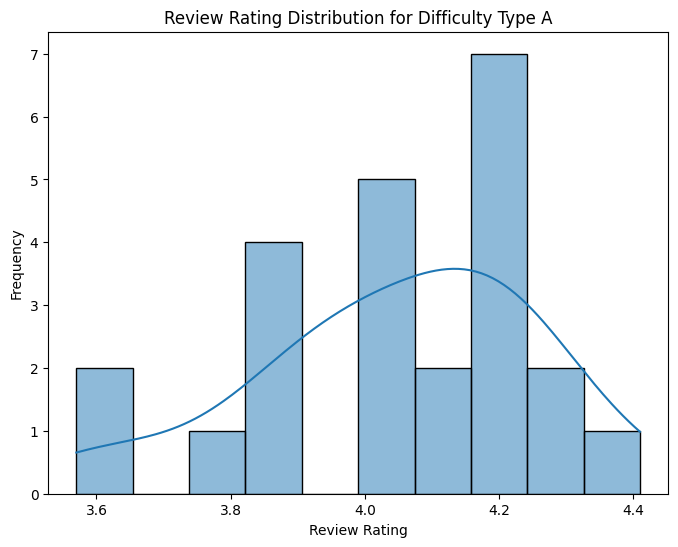

Average review rating for difficulty type D: 3.8479120879120887


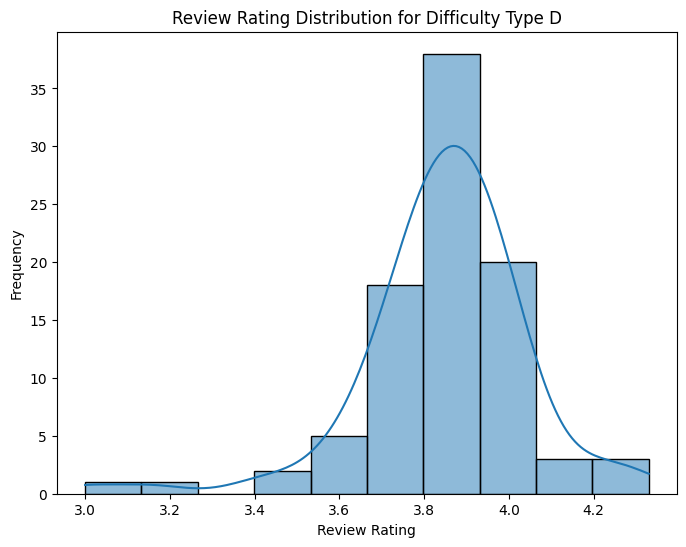

Average review rating for difficulty type F: 3.702120253164557


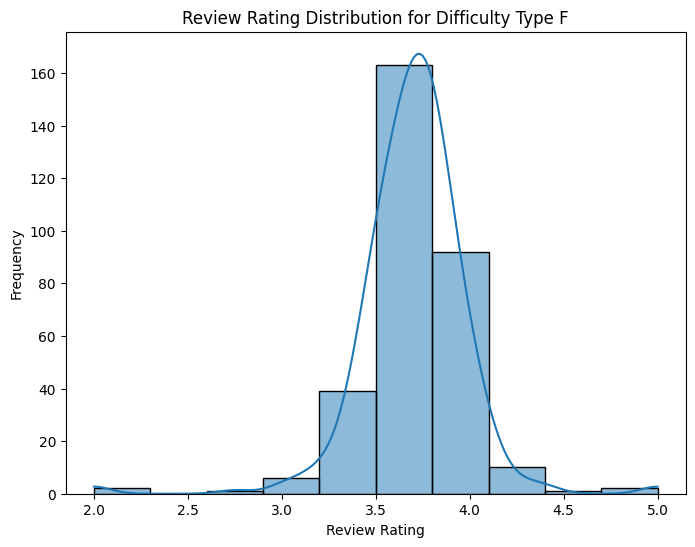

Average review rating for difficulty type C: 3.9094915254237286


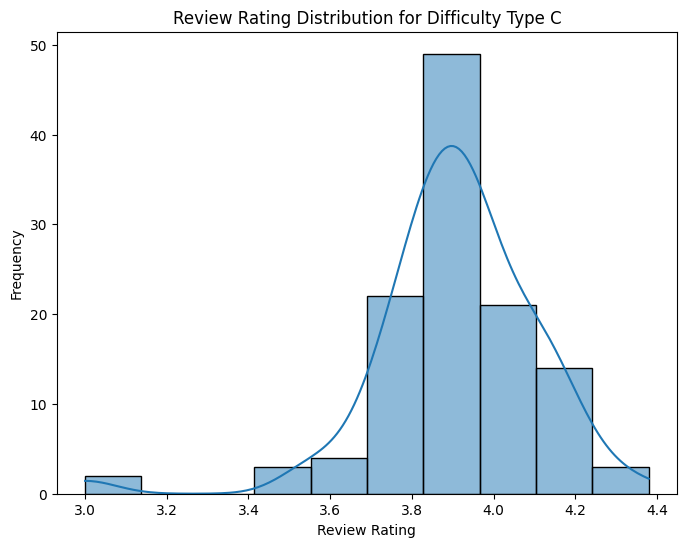

Average review rating for difficulty type B: 3.9755263157894745


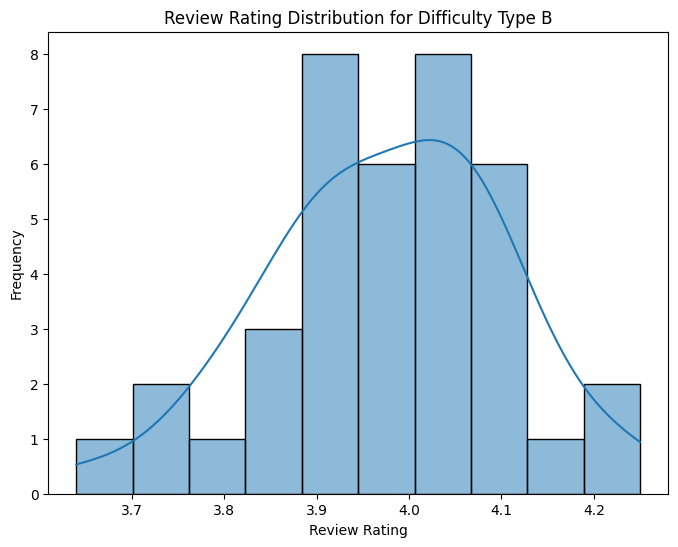

Average review rating for difficulty type E: 3.813947368421053


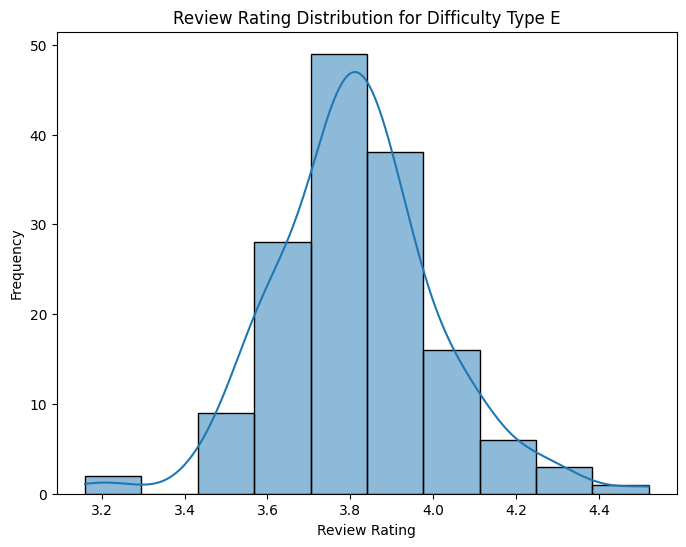

Average review rating for difficulty type S: 4.186999999999999


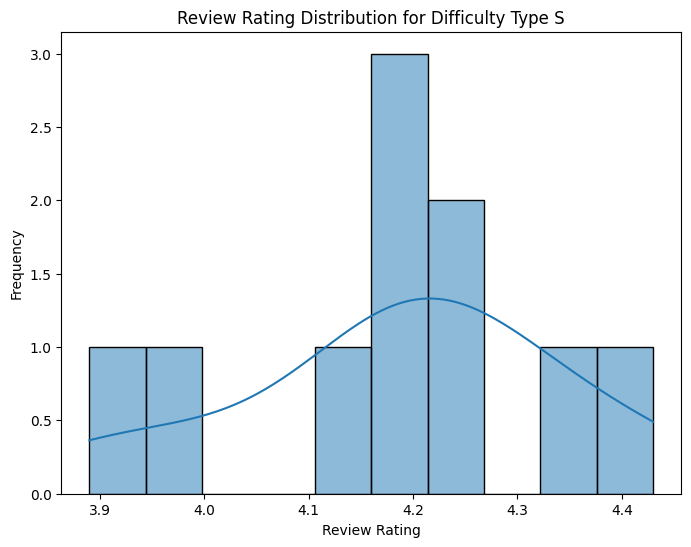

Average review rating for difficulty type nan: nan


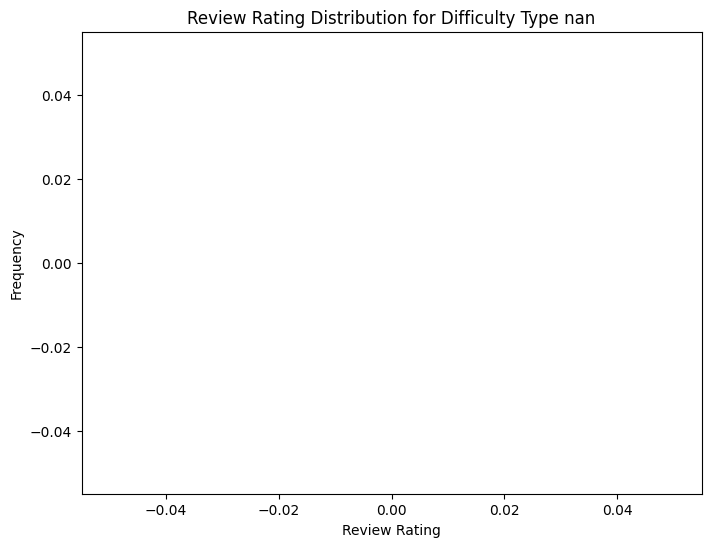

In [97]:
diffucult_type_counts = df['difficulty_rank'].unique()
for i in range(len(diffucult_type_counts)):
    type_data = df[df['difficulty_rank'] == diffucult_type_counts[i]]
    avg_rating_type = type_data['review_rating'].mean()
    print(f'Average review rating for difficulty type {diffucult_type_counts[i]}: {avg_rating_type}')
    plt.figure(figsize=(8,6))
    sns.histplot(type_data['review_rating'], bins=10, kde=True)
    plt.title(f'Review Rating Distribution for Difficulty Type {diffucult_type_counts[i]}')
    plt.xlabel('Review Rating')
    plt.ylabel('Frequency')
    plt.show()

### 設立年による比較
* found カラムを使って、
　・1950年より前にできた大学
　・1950年より後にできた大学
　に分けてください。
1950-аас хойш

* ２つのグループの review_rating を比べてください。

Average review rating for universities founded before 1950: 3.9186877828054296
Average review rating for universities founded in or after 1950: 3.7726689774696704


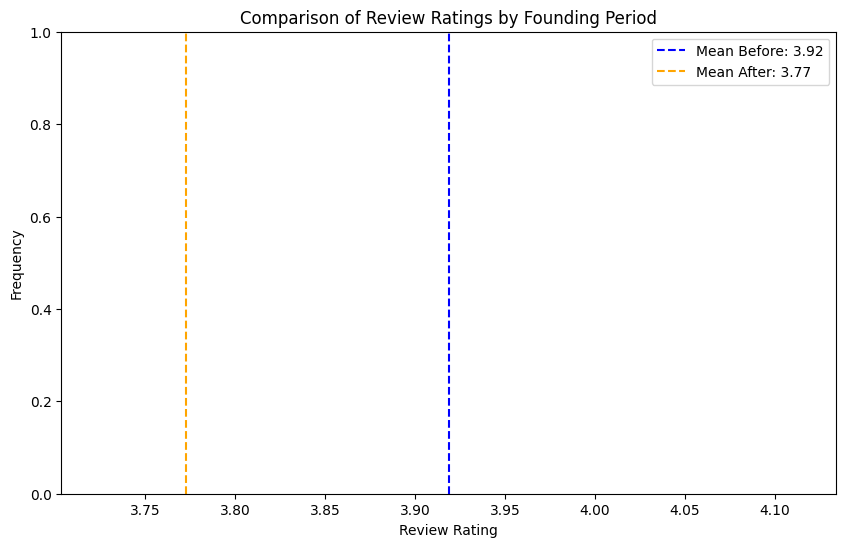

In [116]:
year_int = df['found'].str[:4].astype(int)
before_1950 = year_int < 1950
after_1950 = year_int >= 1950
avg_before_1950 = df[before_1950]['review_rating'].mean()
avg_after_1950 = df[after_1950]['review_rating'].mean()
print(f'Average review rating for universities founded before 1950: {avg_before_1950}')
print(f'Average review rating for universities founded in or after 1950: {avg_after_1950}')
plt.figure(figsize=(10, 6))


# Optional: Add vertical lines to show where the averages are
plt.axvline(avg_before_1950, color='blue', linestyle='--', label=f'Mean Before: {avg_before_1950:.2f}')
plt.axvline(avg_after_1950, color='orange', linestyle='--', label=f'Mean After: {avg_after_1950:.2f}')
plt.title('Comparison of Review Ratings by Founding Period')
plt.xlabel('Review Rating')
plt.ylabel('Frequency')
plt.legend()
plt.show()

### まとめ

* review が高い大学は、難しさも高いですか。

* Private 大学と National 大学の違いは何ですか。

* 地域は、大学に影響がありますか。

Average review ratings by difficulty rank:
  difficulty_rank  review_rating
0               A       4.047083
1               B       3.975526
2               C       3.909492
3               D       3.847912
4               E       3.813947
5               F       3.702120
6               S       4.187000


/tmp/ipykernel_30499/2503040597.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




Text(0.5, 1.0, 'Average Review Rating by Difficulty Rank')

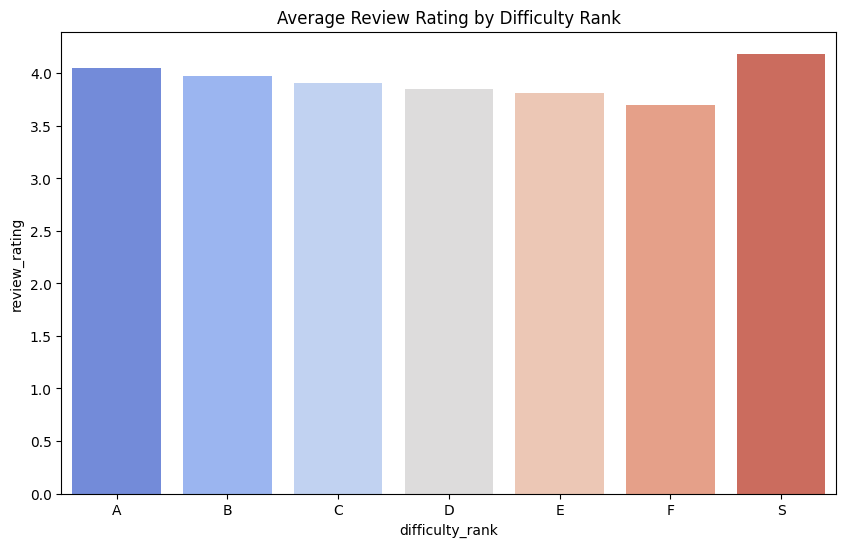

In [117]:
review_hard_diff = df[['review_rating', 'difficulty_rank']].groupby('difficulty_rank').mean().reset_index()
print(f'Average review ratings by difficulty rank:\n{review_hard_diff}')
plt.figure(figsize=(10,6))
sns.barplot(x='difficulty_rank', y='review_rating', data=review_hard_diff, palette='coolwarm')
plt.title('Average Review Rating by Difficulty Rank')   

Average review ratings by university type:
       type  review_rating
0  National       3.980000
1   Private       3.779413
2    Public       3.876768


/tmp/ipykernel_30499/162044067.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




Text(0.5, 1.0, 'Average Review Rating by University Type')

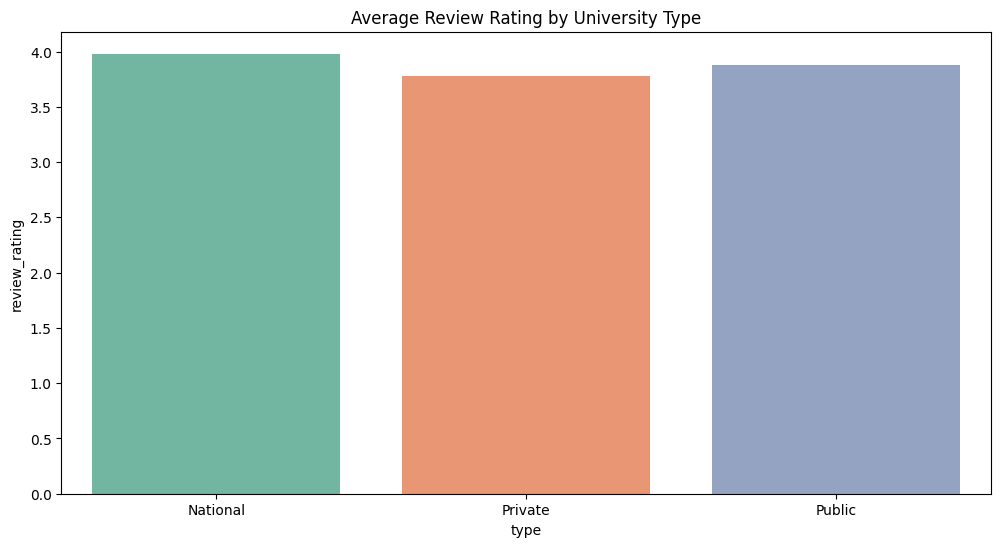

In [122]:
type_review_diff = df[['review_rating', 'type']].groupby('type').mean().reset_index()
print(f'Average review ratings by university type:\n{type_review_diff}')
plt.figure(figsize=(12,6))
sns.barplot(x='type', y='review_rating', data=type_review_diff   , palette='Set2')
plt.title('Average Review Rating by University Type')   

/tmp/ipykernel_30499/2673535588.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




Text(0.5, 1.0, 'Average Review Rating by Region in Japan')

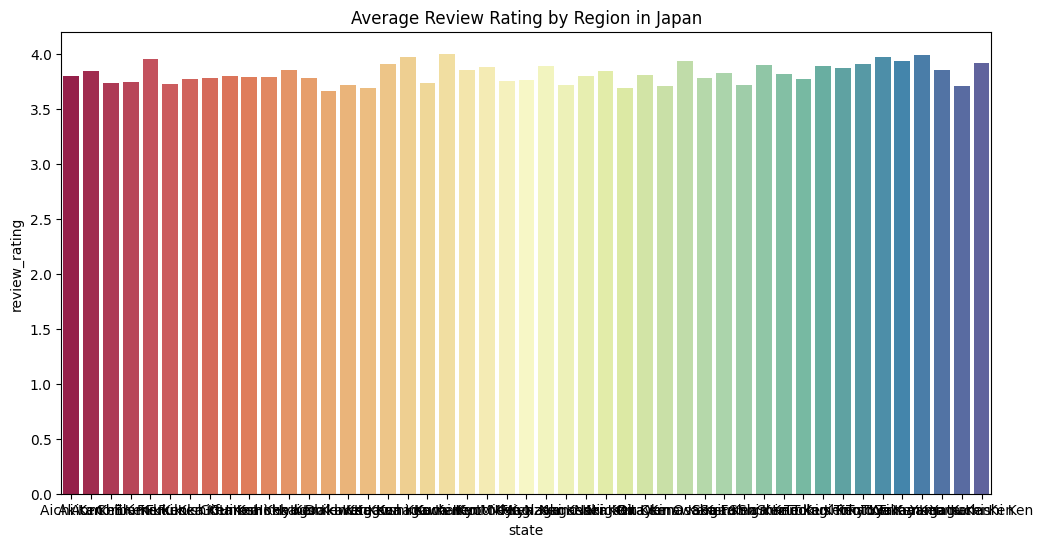

In [121]:
region_review_diff = df[['review_rating', 'state']].groupby('state').mean().reset_index()
plt.figure(figsize=(12,6))
sns.barplot(x='state', y='review_rating', data=region_review_diff           , palette='Spectral')
plt.title('Average Review Rating by Region in Japan')